In [297]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [299]:
df=pd.read_csv(r"C:\Users\praya\Downloads\My Uber Drives - 2016.csv")

In [301]:
df.head(3)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies


In [303]:
df.shape

(1156, 7)

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [307]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [309]:
df.duplicated().sum()

1

In [311]:
df.rename(columns={"START_DATE*": "START_DATE"}, inplace=True)
df.rename(columns={"END_DATE*": "END_DATE"}, inplace=True)

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY*   1155 non-null   object 
 3   START*      1155 non-null   object 
 4   STOP*       1155 non-null   object 
 5   MILES*      1156 non-null   float64
 6   PURPOSE*    653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# data preprocessing

# in this dataset,there are two types of error present,first is to filling missing value in purpose* column into 
# not available and second convert stat date into date time datatype which is in object format now

In [317]:
df['PURPOSE*'].fillna("Not Available",inplace=True)

C:\Users\praya\AppData\Local\Temp\ipykernel_15308\2114794237.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE*'].fillna("Not Available",inplace=True)


In [319]:
df.head()

,START_DATE,END_DATE,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Not Available
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [321]:
df['START_DATE']=pd.to_datetime(df['START_DATE'],errors='coerce')

df['END_DATE']=pd.to_datetime(df['END_DATE'],errors='coerce')

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY*   1155 non-null   object        
 3   START*      1155 non-null   object        
 4   STOP*       1155 non-null   object        
 5   MILES*      1156 non-null   float64       
 6   PURPOSE*    1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [325]:
from datetime import datetime

In [327]:
df['Date']=pd.DatetimeIndex(df['START_DATE']).date

df['Time']=pd.DatetimeIndex(df['START_DATE']).hour

In [329]:
df.head()

,START_DATE,END_DATE,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Date,Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Available,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [331]:
# cut() function is used to categorized value regarding requirement

In [333]:
df['Shift']=pd.cut(x=df['Time'],bins=[0,10,15,19,24],labels=['Morning','Afternoon','Evening','Night'])

In [335]:
df.head()

,START_DATE,END_DATE,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Date,Time,Shift
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Available,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY*   1155 non-null   object        
 3   START*      1155 non-null   object        
 4   STOP*       1155 non-null   object        
 5   MILES*      1156 non-null   float64       
 6   PURPOSE*    1156 non-null   object        
 7   Date        1155 non-null   object        
 8   Time        1155 non-null   float64       
 9   Shift       1136 non-null   category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 82.7+ KB


In [339]:
df.dropna(inplace=True)

In [341]:
df.shape

(1136, 10)

# Data Visulization

# In which category people do book the most uber rides?

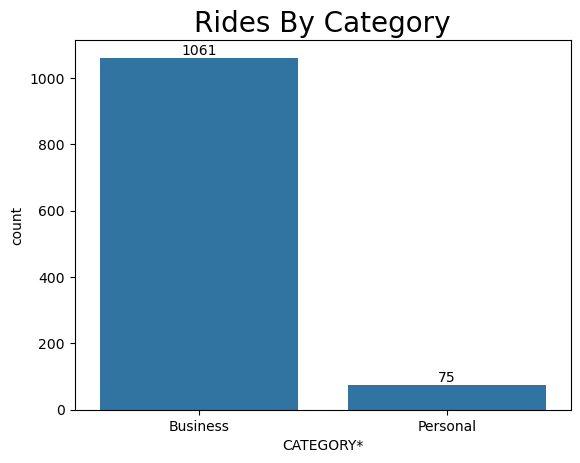

In [345]:
ax=sns.countplot(x=df['CATEGORY*'],data=df)
plt.title('Rides By Category',fontsize=20)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# For which purpose do people book uber rides most?

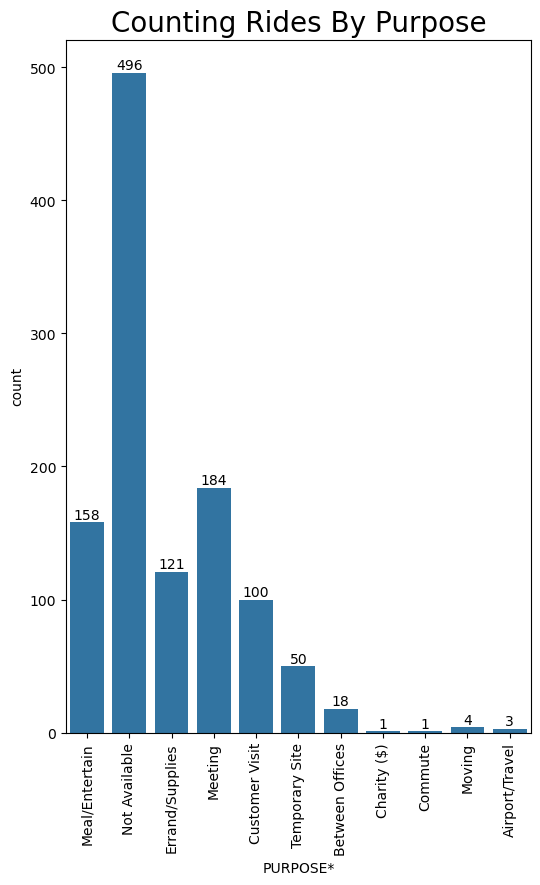

In [348]:
plt.figure(figsize=(6,9))
ax=sns.countplot(x=df['PURPOSE*'],data=df)
plt.xticks(rotation=90)
plt.title('Counting Rides By Purpose',fontsize=20)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# In what time do people book cabs most from uber?

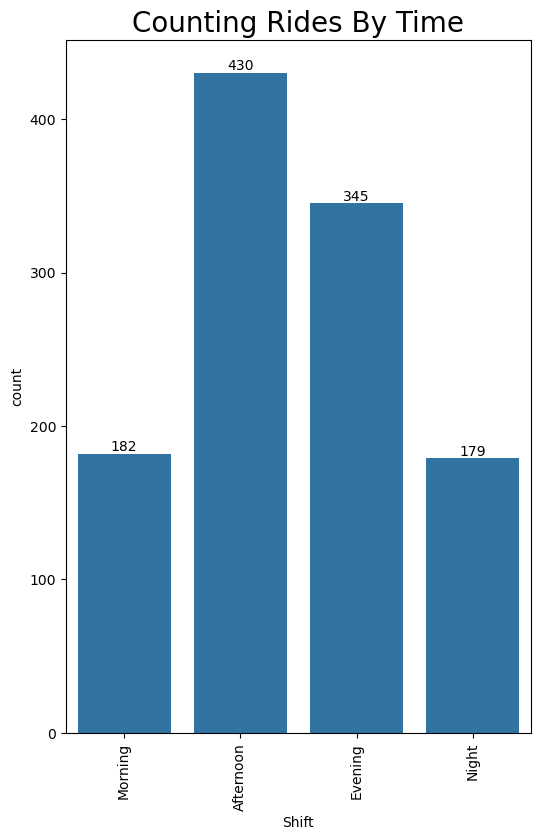

In [352]:
plt.figure(figsize=(6,9))
ax=sns.countplot(x=df['Shift'],data=df)
plt.xticks(rotation=90)
plt.title('Counting Rides By Time',fontsize=20)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# In which months do people book uber rides less frequently?

In [365]:
df['MONTH']=pd.DatetimeIndex(df['START_DATE']).month

month_labels={1.0:"Jan",2.0:'Feb',3.0:'Mar',4.0:'Apri',5.0:'May',6.0:'June',7.0:'July',8.0:'Aug',9.0:'Sept',10.0:'Oct',11.0:'Nov',12.0:'Dec'}
df['MONTH']=df.MONTH.map(month_labels)
mon=df.MONTH.value_counts(sort=False)

AttributeError: Axes.set() got an unexpected keyword argument 'x_label'

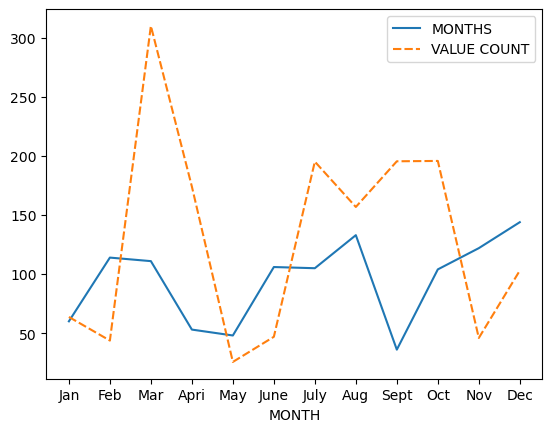

In [412]:
df1=pd.DataFrame(
    {
       "MONTHS":mon.values,
        "VALUE COUNT":df.groupby('MONTH',sort=False)['MILES*'].max()
    }#findout max mile for each month
)

p=sns.lineplot(data=df1)
p.set(x_label="MONTHS",y_label="VALUE COUNT")


# In which day of week do people book uber rides the most?

In [381]:
df['Day']=df.START_DATE.dt.weekday

day_label={
    0:"Mon",1:'Tues',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}

df['Day']=df['Day'].map(day_label)

Text(0, 0.5, 'Count')

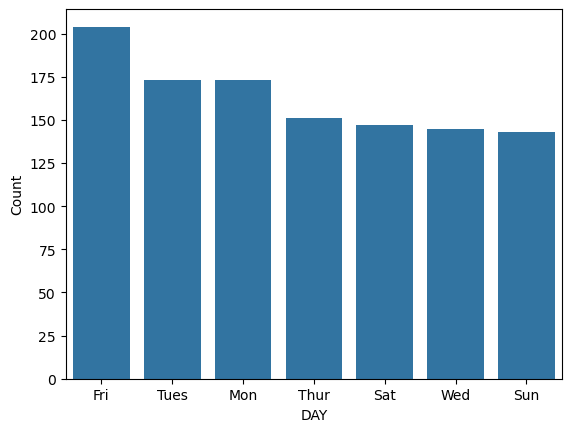

In [388]:
day_label=df.Day.value_counts()

sns.barplot(x=day_label.index,y=day_label)

plt.xlabel('DAY')
plt.ylabel('Count')

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1136 entries, 0 to 1154
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1136 non-null   datetime64[ns]
 1   END_DATE    1136 non-null   datetime64[ns]
 2   CATEGORY*   1136 non-null   object        
 3   START*      1136 non-null   object        
 4   STOP*       1136 non-null   object        
 5   MILES*      1136 non-null   float64       
 6   PURPOSE*    1136 non-null   object        
 7   Date        1136 non-null   object        
 8   Time        1136 non-null   float64       
 9   Shift       1136 non-null   category      
 10  MONTH       1136 non-null   object        
 11  Day         1136 non-null   object        
 12  Month       0 non-null      object        
dtypes: category(1), datetime64[ns](2), float64(2), object(8)
memory usage: 116.7+ KB


# How many Miles do people usually book a cab for through uber?

<Axes: ylabel='MILES*'>

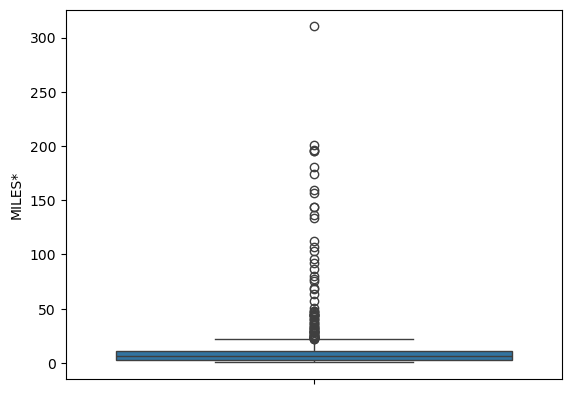

In [394]:
sns.boxplot(df['MILES*'])

<Axes: ylabel='MILES*'>

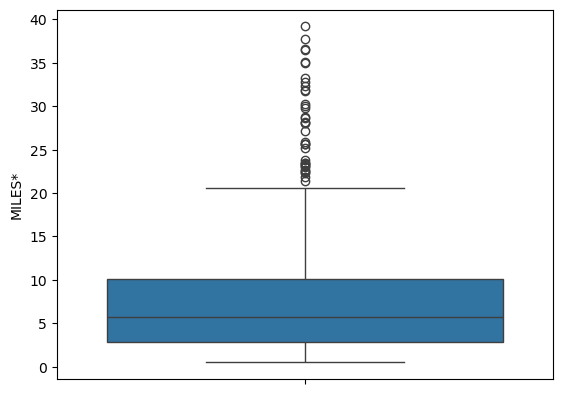

In [402]:
sns.boxplot(df[df['MILES*']<40]['MILES*'])

C:\Users\praya\AppData\Local\Temp\ipykernel_15308\3184901262.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['MILES*']<20]['MILES*'])


<Axes: xlabel='MILES*', ylabel='Density'>

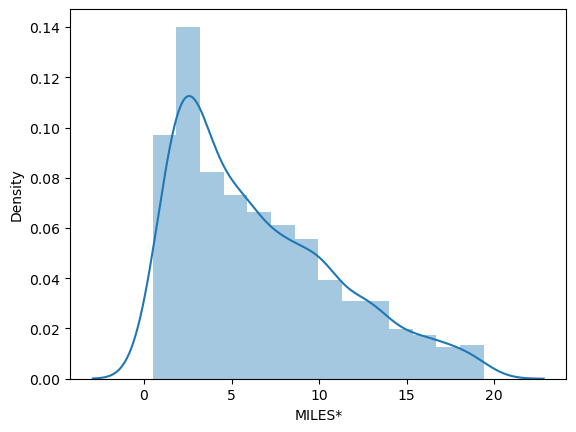

In [406]:
sns.distplot(df[df['MILES*']<20]['MILES*'])